# <center> Program to analyze and find salary of a job profile

I wrote this program so that it can scrape and analyze several jobs listed on Indeed.com or Indeed.ca in this case since I am in Canada and find the average salary of jobs. In addition to this, it also tells us which city in Canada has the maximum number of jobs and maximum salary. I have plotted all this using bar graph to make it visually easy to understand.

 Let's start by asking the user which job title he wants search for. First, we create a variable called <b> *job_title_1*</b> and store the user input in it

In [1]:
job_title_1 = input("Enter the Job Title: ")

Enter the Job Title: Data Analyst


#### Now let's import the required libries

In [2]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
from urllib.request import urlopen
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
import time
print('Libraries imported.')

Libraries imported.


The way Indeed works is it takes the given user input, converts it to lower case and replaces the spaces with +. So we need to do the same.

Let's convert the job title to lower case using <b>.lower()</b> method.

Then, let's replace the spaces with + using <b>.repalce()</b> method.

And then let's see how the output looks, <b>job_title_3</b> in this case.

In [3]:
job_title_2 = job_title_1.lower() # convert to lower case
job_title_3 = job_title_2.replace(' ', '+') # replace space with +
job_title_3

'data+analyst'

In our case, since we are searching for <b>Data Scientist</b> the output looks good, <b>*data+scientist*</b>

Now let's write the code that can scrape Indeed.ca with our <b>*job_title_3*</b>

Here we insert job_title_3 into our url using concatenate feature in python

In [4]:
url = 'https://www.indeed.ca/jobs?q='+job_title_3+'&l=canada'
page = requests.get(url)
soup = BeautifulSoup(page.text, "html.parser")
#print(soup.prettify())

In [5]:
url

'https://www.indeed.ca/jobs?q=data+analyst&l=canada'

Now that we have the the url, let's write a function that will parse the url, extract the data and store it in a dataframe.

In order to get a proper data set, we need to parse more than one page. So let's write the code to parse first 10 pages and store them in the same dataframe using <b>pd.concat</b> function.

In [6]:
def parse(url):
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser', from_encoding="utf-8")
    df = pd.DataFrame(columns=["Title","Location","Company","Salary"])
    for each in soup.find_all(class_= "result" ):
        time.sleep(5)
        try: 
            title = each.find(class_='jobtitle').text.replace('\n', '')
        except:
            title = 'None'
        try:
            location = each.find('span', {'class':"location" }).text.replace('\n', '')
        except:
            location = 'None'
        try: 
            company = each.find(class_='company').text.replace('\n', '')
        except:
            company = 'None'
        try:
            salary = each.find('span', {'class':'no-wrap'}).text.replace('\n', '')
        except:
            salary = 'None'
        #synopsis = each.find('span', {'class':'summary'}).text.replace('\n', '')
        df = df.append({'Title':title, 'Location':location, 'Company':company, 'Salary':salary}, ignore_index=True)
    return df
df1 = parse(url)
url_1 = url + "&start=20"
url_2 = url + "&start=40"
url_3 = url + "&start=60"
url_4 = url + "&start=80"
url_5 = url + "&start=100"
url_6 = url + "&start=120"
url_7 = url + "&start=140"
url_8 = url + "&start=160"
url_9 = url + "&start=180"
url_10 = url + "&start=200"

df2 = parse(url_1)
df3 = parse(url_2)
df4 = parse(url_3)
df5 = parse(url_4)
df6 = parse(url_5)
df7 = parse(url_6)
df8 = parse(url_7)
df9 = parse(url_8)
df10 = parse(url_9)
df11 = parse(url_10)

data1 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11], axis=0, ignore_index=True)
data1.head()

,Title,Location,Company,Salary
0,Data Analyst,None,Toronto Lands Corporation,"$60,000 - $73,000 a year"
1,Supply Chain Analyst,None,Penske,None
2,Data Insights Analyst,None,United Way Centraide Canada,None
3,Data Reporting Analyst,None,Applied Research Investments,"$35,000 - $50,000 a year"
4,Data Analyst,"Mississauga, ON",Springfield Group Inc.,None


In [7]:
data1.shape

(174, 4)

Once we have the dataset, we can see that it has a lot of stuff that we don't need like \n, $ etc. So let's clean up the data.

When we check the data type of data1, we can see that <b>Salary</b> is stored as an object. In addition to that, Salary is defined as per year, per month, per week and per hour. In order for our analysis to work, we need to have salary displayed as per year and the column salary itself should be either <b>*float*</b> or <b>*int*</b>.

In [8]:
data1.dtypes # here, salary is an object

Title       object
Location    object
Company     object
Salary      object
dtype: object

In [9]:
data_sal_year_temp = data1[data1['Salary'].str.contains(' a year')].reset_index(drop=True)
data_sal_year_1a = data_sal_year_temp.replace(' a year', '', regex=True) # replace 'a year'
data_sal_year_1 = data_sal_year_1a.replace('\n', '', regex=True) # replace \n
data_sal_year_2 = data_sal_year_1.replace('[\$,)]', '', regex=True) # replace $
data_sal_year_3a = data_sal_year_2['Salary'].str.split('-', expand=True)
data_sal_year_3a.iloc[:, :] = data_sal_year_3a.iloc[:, :].astype('float')
data_sal_year_3b = data_sal_year_3a.sum(axis=1).astype('float')
data_sal_year_3c = (data_sal_year_3b/2)
data_sal_year_3 = data_sal_year_3c.astype('int')
data_sal_year_5 = pd.concat([data_sal_year_2, data_sal_year_3], axis=1, sort=True)
data_sal_year_6 = data_sal_year_5.drop(['Salary'], axis=1)

This segment takes the salary per month and converts it to per year

In [10]:
data_sal_month_temp = data1[data1['Salary'].str.contains(' a month')].reset_index(drop=True)
data_sal_month_1a = data_sal_month_temp.replace(' a month', '', regex=True)
data_sal_month_1 = data_sal_month_1a.replace('\n', '', regex=True)
data_sal_month_2 = data_sal_month_1.replace('[\$,)]', '', regex=True)
data_sal_month_3a = data_sal_month_2['Salary'].str.split('-', expand=True)
data_sal_month_3a.iloc[:, :] = data_sal_month_3a.iloc[:, :].astype('float')
data_sal_month_3b = data_sal_month_3a.sum(axis=1).astype('float')
data_sal_month_3c = (data_sal_month_3b/2) * 12
data_sal_month_3 = data_sal_month_3c.astype('int')
data_sal_month_5 = pd.concat([data_sal_month_2, data_sal_month_3], axis=1, sort=True)
data_sal_month_6 = data_sal_month_5.drop(['Salary'], axis=1)

This segment takes the salary per week and converts it to per year

In [11]:
data_sal_week_temp = data1[data1['Salary'].str.contains(' a week')].reset_index(drop=True)
data_sal_week_1a = data_sal_week_temp.replace(' a week', '', regex=True)
data_sal_week_1 = data_sal_week_1a.replace('\n', '', regex=True)
data_sal_week_2 = data_sal_week_1.replace('[\$,)]', '', regex=True)
data_sal_week_3a = data_sal_week_2['Salary'].str.split('-', expand=True)
data_sal_week_3a.iloc[:, :] = data_sal_week_3a.iloc[:, :].astype('float')
data_sal_week_3b = data_sal_week_3a.sum(axis=1).astype('float')
data_sal_week_3c = (data_sal_week_3b/2) * 52
data_sal_week_3 = data_sal_week_3c.astype('int')
data_sal_week_5 = pd.concat([data_sal_week_2, data_sal_week_3], axis=1, sort=True)
data_sal_week_6 = data_sal_week_5.drop(['Salary'], axis=1)

This segment takes the salary per hour and converts it to per year

In [12]:
data_sal_hour_temp = data1[data1['Salary'].str.contains(' an hour')].reset_index(drop=True)
data_sal_hour_1a = data_sal_hour_temp.replace(' an hour', '', regex=True)
data_sal_hour_1 = data_sal_hour_1a.replace('\n', '', regex=True)
data_sal_hour_2 = data_sal_hour_1.replace('[\$,)]', '', regex=True)
data_sal_hour_3a = data_sal_hour_2['Salary'].str.split('-', expand=True)
data_sal_hour_3a.iloc[:, :] = data_sal_hour_3a.iloc[:, :].astype('float')
data_sal_hour_3b = data_sal_hour_3a.sum(axis=1).astype('float')
data_sal_hour_3c = (data_sal_hour_3b/2) * 40 * 52
data_sal_hour_3 = data_sal_hour_3c.astype('int')
data_sal_hour_5 = pd.concat([data_sal_hour_2, data_sal_hour_3], axis=1, sort=True)
data_sal_hour_6 = data_sal_hour_5.drop(['Salary'], axis=1)

Let's sort the rows that don't have any salary mentioned and save them in <b>data_sal_none_temp</b>

In [13]:
data_sal_none_temp = data1[data1['Salary'].str.contains('None')].reset_index(drop=True)
data_sal_none_temp.head()

,Title,Location,Company,Salary
0,Supply Chain Analyst,None,Penske,None
1,Data Insights Analyst,None,United Way Centraide Canada,None
2,Data Analyst,"Mississauga, ON",Springfield Group Inc.,None
3,Jr. Data Analyst,"Calgary, AB",CBI Health Group,None
4,Data Centre Analyst,"Calgary, AB",BGIS,None


Now let's bring together our newly formed dataset and save it as <b>data_sal_all</b> and rename the table header as <b>Title</b>, <b>Location</b>, <b>Company</b>, <b>Synopsis</b> and <b>Salary</b>

In [14]:
data_sal_all = pd.concat([data_sal_year_6, data_sal_month_6, data_sal_week_6, data_sal_hour_6], axis=0, sort=True)
data_sal_all.columns = ['Title', 'Location', 'Company', 'Salary']
data_sal_all.sort_values(by='Salary',ascending=True, inplace=True)
data_sal_all.head()

,Title,Location,Company,Salary
1,Data Entry Analyst,Goderich ON,Complete Wind Corporation,15080
2,Data Intelligence Analyst,Mississauga ON,ZeMaas Technologies,15600
15,IT Migration and Data Analyst,None,ECM Wise,20082
23,IT Migration and Data Analyst,None,ECM Wise,20082
19,IT Migration and Data Analyst,None,ECM Wise,20082


Now, let's join the two data sets, <b>data_sal_all</b> and <b>data_sal_none_temp</b> and save them in <b>data_sal_all_1</b>

In [15]:
data_sal_all_1 = pd.concat([data_sal_all, data_sal_none_temp], axis=0, sort=True)
data_sal_all_1.head()

,Company,Location,Salary,Title
1,Complete Wind Corporation,Goderich ON,15080,Data Entry Analyst
2,ZeMaas Technologies,Mississauga ON,15600,Data Intelligence Analyst
15,ECM Wise,None,20082,IT Migration and Data Analyst
23,ECM Wise,None,20082,IT Migration and Data Analyst
19,ECM Wise,None,20082,IT Migration and Data Analyst


Let's see the shape of <b>data_sal_all_1</b>

In [16]:
data_sal_all_1.shape

(174, 4)

The shape of <b>data_sal_all_1</b> is <b>(283, 5)</b> which is same as the shape of <b>data1</b>.
This proves that we successfully managed to merge the 2 datasets without missing any row.

Now let's replace <b>'None'</b> values with <b>np.nan</b> and change the data type of <b>Salary</b> to *float*

In [17]:
data5a = data_sal_all_1.replace('None',np.nan, regex=True)
data5a['Salary'].astype('float')

1      15080.0
2      15600.0
15     20082.0
23     20082.0
19     20082.0
13     20082.0
3      20082.0
8      20082.0
7      25000.0
16     32760.0
10     35360.0
0      35360.0
13     35360.0
14     36400.0
15     40560.0
5      41652.0
1      42500.0
21     47500.0
26     47500.0
16     47500.0
11     47500.0
28     47500.0
7      52000.0
3      52000.0
31     57500.0
4      59706.0
6      59706.0
29     66500.0
0      66500.0
12     66500.0
        ...   
91         NaN
92         NaN
93         NaN
94         NaN
95         NaN
96         NaN
97         NaN
98         NaN
99         NaN
100        NaN
101        NaN
102        NaN
103        NaN
104        NaN
105        NaN
106        NaN
107        NaN
108        NaN
109        NaN
110        NaN
111        NaN
112        NaN
113        NaN
114        NaN
115        NaN
116        NaN
117        NaN
118        NaN
119        NaN
120        NaN
Name: Salary, Length: 174, dtype: float64

Now, let's find the mean of the the cell Sa;ary using the .mean() method

In [18]:
mean_1 = data5a['Salary'].mean()
mean_1

58720.77358490566

We can now replace the np.nan cells with the mean salary obtained in the previous step.

Let's also change the datatype to *int*

In [19]:
data5b = data5a['Salary'].replace(np.nan, mean_1)
data5ba = data5b.astype('int')

Let's concact this salary to our previous dataframe <b>data_sal_all_1</b>

In [20]:
data5c = pd.concat([data_sal_all_1, data5ba], axis=1)
data5c.reset_index()

,index,Company,Location,Salary,Title,Salary
0,1,Complete Wind Corporation,Goderich ON,15080,Data Entry Analyst,15080
1,2,ZeMaas Technologies,Mississauga ON,15600,Data Intelligence Analyst,15600
2,15,ECM Wise,None,20082,IT Migration and Data Analyst,20082
3,23,ECM Wise,None,20082,IT Migration and Data Analyst,20082
4,19,ECM Wise,None,20082,IT Migration and Data Analyst,20082
5,13,ECM Wise,None,20082,IT Migration and Data Analyst,20082
6,3,ECM Wise,None,20082,IT Migration and Data Analyst,20082
7,8,ECM Wise,None,20082,IT Migration and Data Analyst,20082
8,7,Fraser Northwest Division of Family Practice,New Westminster BC,25000,Data Analyst,25000
9,16,CENTURION HARDWOOD FLOORS LTD,Richmond BC,32760,database analyst (DBA,32760


Now we have two Salary columns in our dataframe, so we rename the old one to Salary_1 and drop it.

In [21]:
data5c.columns = ['Company', 'Location', 'Salary_1', 'Title', 'Salary']
data5d = data5c.drop(['Salary_1'], axis=1)
data5d.head()

,Company,Location,Title,Salary
1,Complete Wind Corporation,Goderich ON,Data Entry Analyst,15080
2,ZeMaas Technologies,Mississauga ON,Data Intelligence Analyst,15600
15,ECM Wise,None,IT Migration and Data Analyst,20082
23,ECM Wise,None,IT Migration and Data Analyst,20082
19,ECM Wise,None,IT Migration and Data Analyst,20082


Let's procede with the cleanup of our dataset. Let's drop the cells that don't have any location as it won't be useful to us in our analysis.

In [22]:
data6a = data5d.replace('None',np.nan, regex=True)
data6 = data6a[pd.notnull(data5d["Location"])]
data6 = data6.reset_index(drop=True)
data7 = data6.groupby('Location').count()
sort_data = data7.sort_values('Title',ascending=False)

In [23]:
sort_data.head(10)

,Company,Title,Salary
Location,,,
"Toronto, ON",23,23,23
Toronto ON,9,9,9
"Vancouver, BC",8,8,8
"Montréal, QC",8,8,8
"Mississauga, ON",8,8,8
"Calgary, AB",6,6,6
Ontario,6,6,6
"Ottawa, ON",5,5,5
"Brampton, ON",3,3,3


As we can see above, <b>sort_data</b> has a location <b>Canada</b>. We need to drop that row. Since we made our code flexible by asking the user to input his job title, this field might not show up in other job titles. Hence we need to write the code that will check if this field is there, and if it, drop it, else procede without doing anything.

In [24]:
sort_data_canada_1 = sort_data.reset_index()
sort_data_canada_2 = sort_data_canada_1.iloc[:, 0]
sort_data_canada_3 = sort_data_canada_2.isin(['Canada'])

In [25]:
if sort_data_canada_3.any() == True:
    sort_data_1 = sort_data.drop(['Canada'], axis=0)
else:
    sort_data_1 = sort_data

In [26]:
sort_data_2 = sort_data_1.reset_index()
sort_data_2.head()

,Location,Company,Title,Salary
0,"Toronto, ON",23,23,23
1,Toronto ON,9,9,9
2,"Vancouver, BC",8,8,8
3,"Montréal, QC",8,8,8
4,"Mississauga, ON",8,8,8


Now let's split the location into <b>City</b> and <b>Provience</b>

In [27]:
data1 = sort_data_2['Location'].str.split(',', expand=True)
data1.columns = ['City', 'Provience']
data1.head()

,City,Provience
0,Toronto,ON
1,Toronto ON,None
2,Vancouver,BC
3,Montréal,QC
4,Mississauga,ON


Now let's merge this new data with the previous data and drop the column <b>Location</b>

In [28]:
data2 = pd.concat([data1, sort_data_2], axis=1, sort=False)
data3 = data2.drop(['Location'], axis=1)
data3.head()

,City,Provience,Company,Title,Salary
0,Toronto,ON,23,23,23
1,Toronto ON,None,9,9,9
2,Vancouver,BC,8,8,8
3,Montréal,QC,8,8,8
4,Mississauga,ON,8,8,8


Let's see which <b>Provience</b> has the maximum number of jobs.

In [29]:
data4 = data3.groupby('Provience')['Title'].apply(lambda x: ', '.join(x.astype(str))).reset_index()
data5 = data4['Title'].str.split(',', expand=True)
data5.iloc[:, :] = data5.iloc[:, :].astype(float)
data5['Total'] = data5.sum(axis=1).astype(int)
data8 = data5.loc[:, 'Total']
data9 = data4.loc[:, 'Provience']
data10 = pd.concat([data9, data8], axis=1, sort=True)
data10

,Provience,Total
0,AB,6
1,BC,13
2,MB,2
3,NB,4
4,NS,3
5,ON,55
6,QC,9
7,YT,2


Let's sort the dataframe by which <b>City</b> has the maximum number of jobs and arrange it in ascending order.

In [30]:
data11 = sort_data_1
data11.sort_values(by='Title', ascending=True, inplace=True)
data12 = data11.loc[:, 'Title']
data13 = data12.tail(15)
data13

Location
Waterloo, ON        2
Whitehorse, YT      2
Markham, ON         2
Belledune, NB       2
Brampton, ON        3
Halifax, NS         3
Cambridge, ON       3
Ottawa, ON          5
Ontario             6
Calgary, AB         6
Mississauga, ON     8
Montréal, QC        8
Vancouver, BC       8
Toronto ON          9
Toronto, ON        23
Name: Title, dtype: int64

Now let's make sure we don't have any duplicated in our dataframe

In [31]:
data5d.drop_duplicates(keep=False,inplace=True)
data5d.head()

,Company,Location,Title,Salary
1,Complete Wind Corporation,Goderich ON,Data Entry Analyst,15080
2,ZeMaas Technologies,Mississauga ON,Data Intelligence Analyst,15600
7,Fraser Northwest Division of Family Practice,New Westminster BC,Data Analyst,25000
16,CENTURION HARDWOOD FLOORS LTD,Richmond BC,database analyst (DBA,32760
10,Olivia Marie Gardens Medical Centre Inc,Brampton ON,database analyst,35360


As we can see, many job titles have the same salary listed. For our last step, data visualization, we don’t need same salaries for different job titles, we just need one. So we group them by salary and then sort them in ascending order.

In [32]:
data5e = data5d.groupby('Salary')['Company'].apply(' '.join).reset_index()
data5e.sort_values(by='Salary', ascending=True, inplace=True)

In [33]:
data_sal_all_1 = data5e.loc[:,'Salary']
data_sal_all_2 = data_sal_all_1.tail(15)
data_sal_all_2

4      35360
5      36400
6      40560
7      41652
8      42500
9      57500
10     58720
11     68467
12     69680
13     72264
14     78326
15     85000
16     93600
17     97128
18    212500
Name: Salary, dtype: int64

Now, let's plot which city has the maximum number of jobs.

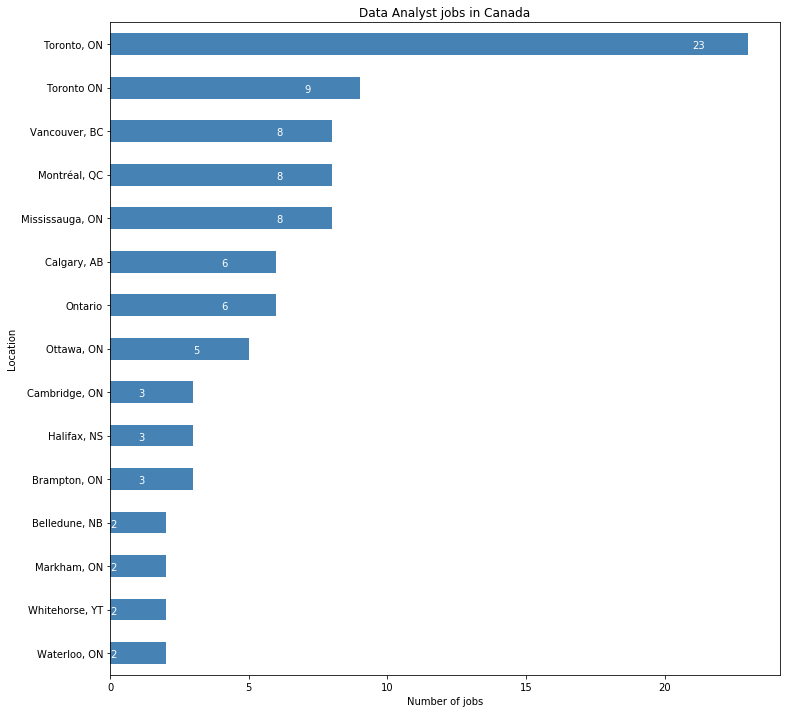

In [34]:
data13.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of jobs')
plt.title(job_title_1+' jobs in Canada')

for index, value in enumerate(data13): 
    label = format(int(value), ',')
    
    plt.annotate(label, xy=(value - 2, index - 0.10), color='white')

plt.show()

Let's plao the salary range as well.

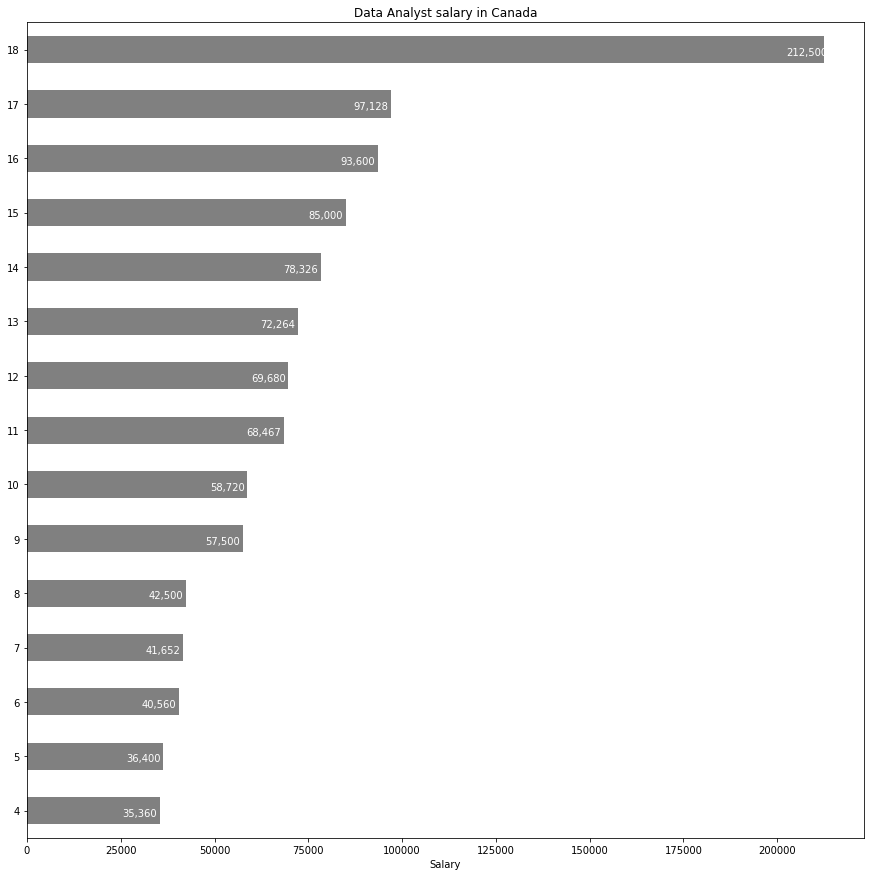

In [35]:
data_sal_all_2.plot(kind='barh', figsize=(15, 15), color='grey')
plt.xlabel('Salary')
plt.title(job_title_1+' salary in Canada')

for index, value in enumerate(data_sal_all_2): 
    label = format(int(value), ',') # format int with commas
    
    plt.annotate(label, xy=(value - 10000, index - 0.10), color='white')

plt.show()